<a href="https://colab.research.google.com/github/josephfachrezi/polynomialregression/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 4)
X_poly = poly_regressor.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lin_reg_2.coef_)
print(lin_reg_2.intercept_)

[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719737


In [ ]:
print(X_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


## Visualising the Linear Regression results

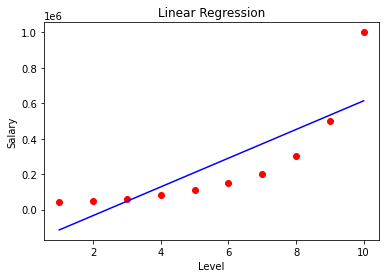

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X,linear_regressor.predict(X),color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results

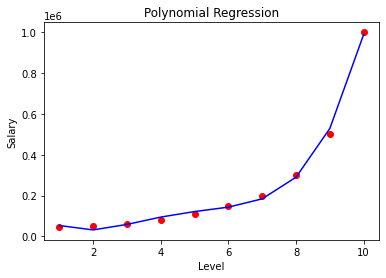

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X,lin_reg_2.predict(poly_regressor.fit_transform(X)),color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

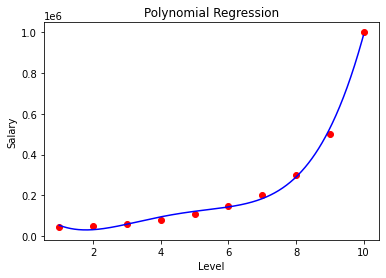

In [ ]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid,lin_reg_2.predict(poly_regressor.fit_transform(X_grid)),color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
print(linear_regressor.predict([[6.5]]))

[330378.78787879]


## Predicting a new result with Polynomial Regression

In [ ]:
print(lin_reg_2.predict(poly_regressor.fit_transform([[6.5]])))

[158862.45265155]


## Using statsmodels Library


In [ ]:
import statsmodels.api as sm
X_poly_sm = sm.add_constant(X_poly) #Assigning the training set to new training set
model = sm.OLS(y, X_poly_sm).fit() #Fitting the model to training set
print(model.summary()) #Looking for model's summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     478.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):           1.21e-06
Time:                        14:17:07   Log-Likelihood:                -110.01
No. Observations:                  10   AIC:                             230.0
Df Residuals:                       5   BIC:                             231.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.842e+05   6.78e+04      2.718      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
X_test = [[7]]
X_test = poly_regressor.fit_transform(X_test)
X_test = sm.add_constant(X_test)
ypred = model.predict(X_poly_sm)
print(model.predict(X_test))

[184003.49650353]


In [ ]:
print(ypred)

[ 53356.64335653  31759.90675978  58642.19114207  94632.86713276
 121724.94172486 143275.05827503 184003.49650353 289994.17249429
 528694.63869487 988916.08391645]


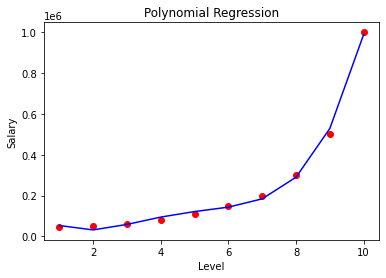

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X,model.predict(X_poly_sm),color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()